In [3]:
import pandas as pd
import numpy as np

In [4]:
fraud=pd.read_csv("Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


In [6]:
fraud["Undergrad"]=label.fit_transform(fraud["Undergrad"])
fraud["Marital.Status"]=label.fit_transform(fraud["Marital.Status"])
fraud["Urban"]=label.fit_transform(fraud["Urban"])
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [7]:
# converting people with greater than 30k income as True - 1 and people with <30k income as False - 0


fraud["Taxable.Income"]=(fraud["Taxable.Income"]>30000)*1

In [8]:
fraud.duplicated().sum()

0

In [9]:
y=fraud.iloc[:,2]
y

0      1
1      1
2      1
3      1
4      1
      ..
595    1
596    1
597    1
598    1
599    1
Name: Taxable.Income, Length: 600, dtype: int64

In [10]:
x=fraud.drop(columns='Taxable.Income',axis=1)
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)
x_train.shape,y_train.shape

((420, 5), (420,))

In [62]:
from sklearn.tree import DecisionTreeClassifier
model_1=DecisionTreeClassifier(criterion='entropy',max_depth=2)
model_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [63]:
from sklearn import tree
import matplotlib.pyplot as plt

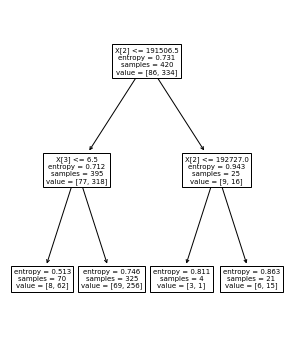

In [64]:
plt.figure(figsize=(5,6))
tree.plot_tree(model_1);

[Text(465.0, 755.0, 'Taxable.Income <= 191506.5\nentropy = 0.731\nsamples = 420\nvalue = [86, 334]\nclass = NO'),
 Text(232.5, 453.0, 'City_Population <= 6.5\nentropy = 0.712\nsamples = 395\nvalue = [77, 318]\nclass = NO'),
 Text(116.25, 151.0, 'entropy = 0.513\nsamples = 70\nvalue = [8, 62]\nclass = NO'),
 Text(348.75, 151.0, 'entropy = 0.746\nsamples = 325\nvalue = [69, 256]\nclass = NO'),
 Text(697.5, 453.0, 'Taxable.Income <= 192727.0\nentropy = 0.943\nsamples = 25\nvalue = [9, 16]\nclass = NO'),
 Text(581.25, 151.0, 'entropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = YES'),
 Text(813.75, 151.0, 'entropy = 0.863\nsamples = 21\nvalue = [6, 15]\nclass = NO')]

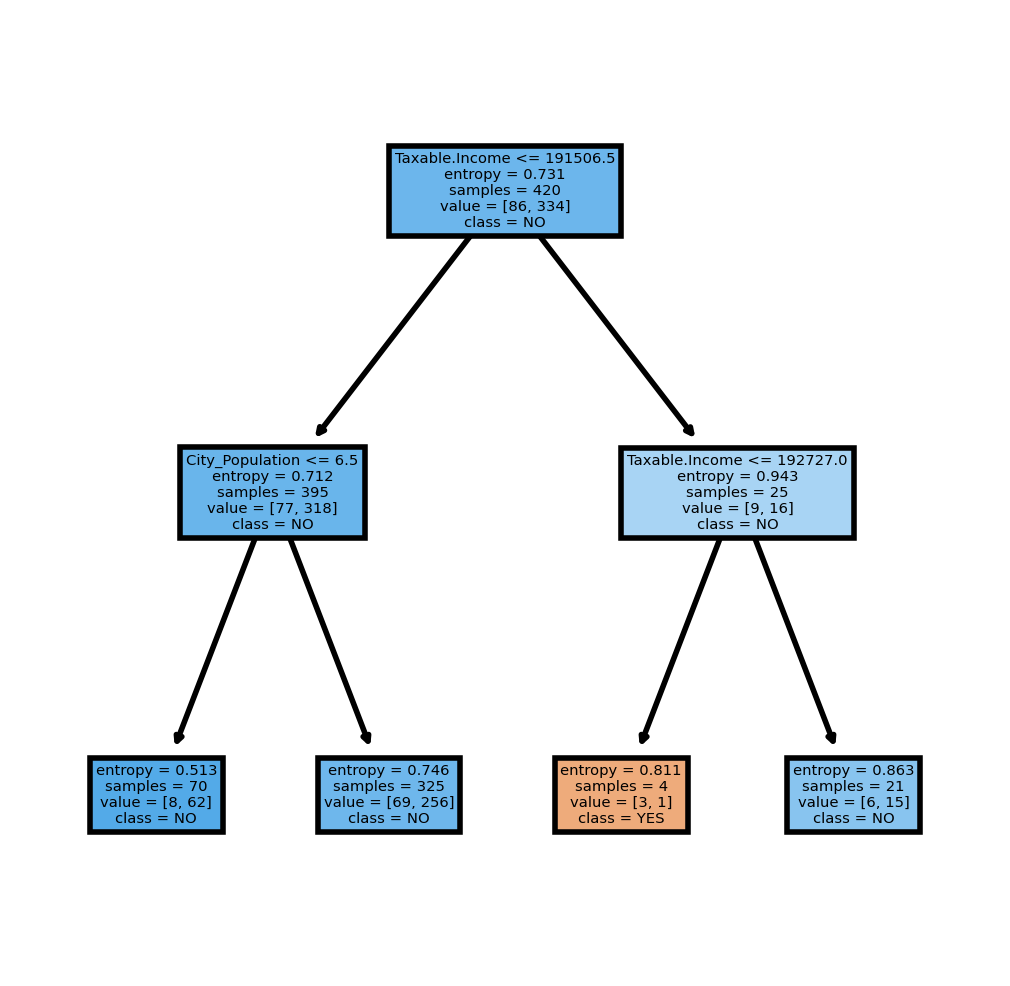

In [65]:
ind_var=['Undergrad', 'Marital.Status', 'Taxable.Income', 'City_Population', 'Work_Experience']
dep_var=['YES','NO']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=400)
tree.plot_tree(model_1,feature_names=ind_var,class_names=dep_var,filled=True)

In [66]:
model_1.score(x_train,y_train)

0.8

In [67]:
model_1.score(x_test,y_test)

0.7777777777777778

In [68]:
pred_1=model_1.predict(x_test)
pred_1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [69]:
#predicting the probabilities
model_1.predict_proba(x_test)

array([[0.21230769, 0.78769231],
       [0.28571429, 0.71428571],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.11428571, 0.88571429],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.28571429, 0.71428571],
       [0.21230769, 0.78769231],
       [0.11428571, 0.88571429],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.11428571, 0.88571429],
       [0.11428571, 0.88571429],
       [0.11428571, 0.88571429],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.

In [80]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,pred_1)
cm

array([[  0,  38],
       [  2, 140]])

In [75]:
print(classification_report(y_test,pred_1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.79      0.99      0.87       142

    accuracy                           0.78       180
   macro avg       0.39      0.49      0.44       180
weighted avg       0.62      0.78      0.69       180



Text(0.5, 1.0, 'Accuracy score0.7777777777777778')

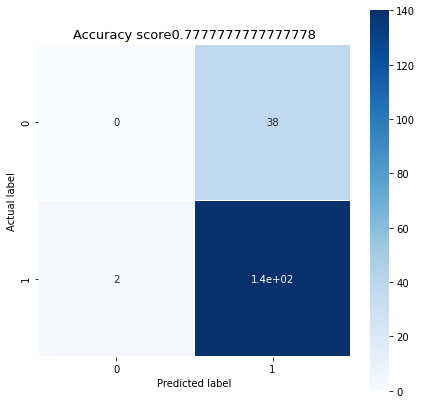

In [87]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.heatmap(data=cm,linewidths=.5,annot=True,square=True,cmap='Blues')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
heading='Accuracy score{0}'.format(model_1.score(x_test,y_test))
plt.title(heading,size=13)

In [22]:
model_2=DecisionTreeClassifier(criterion='gini',max_depth=2)
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [23]:
model_2
pred_2=model_2.predict(x_test)
pred_2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [24]:
confusion_matrix(y_test,pred_2)

array([[  0,  38],
       [  2, 140]])

In [25]:
model_2.predict_proba(x_test)

array([[0.21230769, 0.78769231],
       [0.28571429, 0.71428571],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.11428571, 0.88571429],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.28571429, 0.71428571],
       [0.21230769, 0.78769231],
       [0.11428571, 0.88571429],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.11428571, 0.88571429],
       [0.11428571, 0.88571429],
       [0.11428571, 0.88571429],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.21230769, 0.78769231],
       [0.

In [26]:
#grid search cv
from sklearn.model_selection import GridSearchCV


In [34]:
entropy=[10,14,19,20]
parameters=dict(values=entropy)
parameters
temp={'type':['entropy','gini'],
     'entropy':[10,14,19,20,9,3,2,1],
     'gini':[1,2,3,4,5,10,13,15,18]}
temp

{'type': ['entropy', 'gini'],
 'entropy': [10, 14, 19, 20, 9, 3, 2, 1],
 'gini': [1, 2, 3, 4, 5, 10, 13, 15, 18]}

In [37]:
model=DecisionTreeClassifier()
grid=GridSearchCV(estimator='model',param_grid=temp)
grid.fit(x,y)

TypeError: estimator should be an estimator implementing 'fit' method, 'model' was passed

In [36]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'